In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from skopt.plots import plot_convergence

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [298]:
def scalerIntoLogReg (variable = X, target = y,testsize = 0.2, learningrate = 0.06, solver = "liblinear") :

    """ possible solver : “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”
    """
    
    _learningrate= learningrate
    max_iter = 1000
    sc = StandardScaler()
    X = sc.fit_transform(variable)
    
    X_train, X_test, y_train, y_test = train_test_split(variable, target, test_size=testsize, stratify = y, random_state=42)
    
    lr = LogisticRegression(solver =solver)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_pred = pd.DataFrame(y_pred)
    #lr.score (y_test, y_pred)
    #lr.proba()
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot()
    print(classification_report(y_test, y_pred))
    plot_learning_curve(LinearRegression(),"Learning Curve",X,y)
    

In [302]:
def scalerIntoPolyLogReg (variable = X, target = y,testsize = 0.2, solver = "liblinear") :

    """ possible solver : “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”
    """
    max_iter = 1000
    sc = StandardScaler()
    poly = PolynomialFeatures(degree = 2)
    X = sc.fit_transform(variable)
    X_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(variable, target, test_size=testsize, stratify = y, random_state=42)
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_pred = pd.DataFrame(y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot()
    print(classification_report(y_test, y_pred))
    plot_learning_curve(LinearRegression(),"Learning Curve",X,y)

### IMPORT DONNEE SECOM

In [246]:
data = pd.read_csv("secom.data", sep=" ")


nom = []
for i in range (590) :
    nom.append (i)
data.columns = nom

data

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
1,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
2,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
3,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
4,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1562,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1563,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1564,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [247]:
label = pd.read_csv("secom_labels.data", sep = " ")
label.columns = ["target","date"]
label

,target,date
0,-1,19/07/2008 12:32:00
1,1,19/07/2008 13:17:00
2,-1,19/07/2008 14:43:00
3,-1,19/07/2008 15:22:00
4,-1,19/07/2008 17:53:00
...,...,...
1561,-1,16/10/2008 15:13:00
1562,-1,16/10/2008 20:49:00
1563,-1,17/10/2008 05:26:00
1564,-1,17/10/2008 06:01:00


# FUSION DES DATASET

In [248]:
df = pd.concat([data,label], ignore_index=True,  axis=1)
df = df.set_index(591)
df

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,590
591,,,,,,,,,,,,,,,,,,,,,
19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
19/07/2008 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16/10/2008 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
16/10/2008 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
17/10/2008 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1


# Exploration des na

<AxesSubplot:>

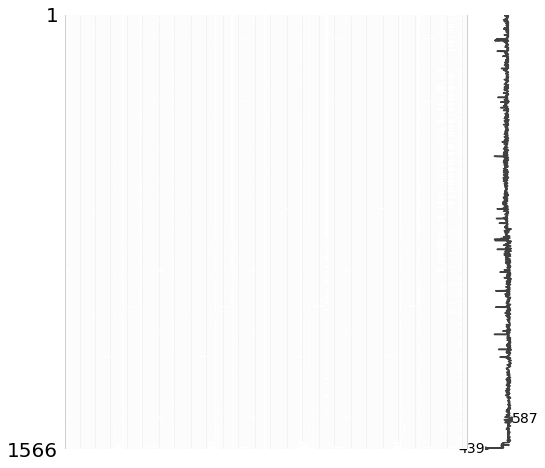

In [430]:
msno.matrix(df, figsize=(8,8))

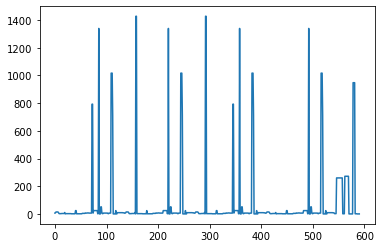

In [249]:
na = np.sum(df.isna())
na.plot()
na = na.sort_values(ascending = False)
na.head(40)
na = pd.DataFrame(na)
#na.value_counts().sort_values()

L'étude des na dans les colonnes indique qu'une trentaine de colonnes sont au moins à moitier vide. On va les supprimer pour le test 2.

On surpprime également les colonnes ayant une variance = 0.

In [250]:
print("Avant suppresion sur la variance : ", np.shape(df))

for col in df :    
    if (df[col].std()== 0): 
        df = df.drop(col, axis = 1)
        
print("Apres suppresion sur la variance : ", np.shape(df))

Avant suppresion sur la variance :  (1566, 591)
Apres suppresion sur la variance :  (1566, 475)


In [449]:
df.describe()

,0,1,2,3,4,6,7,8,9,10,...,581,582,583,584,585,586,587,588,589,590
count,1560.000000,1559.000000,1552.000000,1552.000000,1552.000000,1552.000000,1557.000000,1564.000000,1564.000000,1564.000000,...,618.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.442333,2495.806517,2200.555574,1396.367124,4.198841,101.115163,0.121820,1.462838,-0.000852,0.000148,...,97.934373,0.500096,0.015320,0.003847,3.068277,0.021458,0.016475,0.005283,99.670066,-0.867178
std,73.644212,80.414961,29.520871,441.833848,56.373659,6.238591,0.008964,0.073914,0.015115,0.009305,...,87.520966,0.003405,0.017185,0.003722,3.579132,0.012358,0.008808,0.002867,93.891919,0.498158
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,-0.034900,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.255000,2452.215000,2181.024950,1081.875800,1.017700,97.933350,0.121100,1.411150,-0.010800,-0.005600,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.405000,2499.350000,2201.066700,1285.214400,1.316800,101.512200,0.122400,1.461550,-0.001300,0.000400,...,72.288900,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.725000,2538.755000,2218.055500,1591.223500,1.526550,104.586700,0.123800,1.516900,0.008400,0.005900,...,116.539150,0.502400,0.016500,0.004100,3.295400,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,0.053000,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


# TEST 1 : Log Reg :  fill na

In [7]:
df2 = df.fillna(df.mean(numeric_only=True))
print("df2: ", np.shape(df2))
np.sum(df2.isna()).sort_values(ascending= False).sort_values(ascending = False)
X = df2.drop(590, axis = 1)
y = df2[590]

df2:  (1566, 475)


              precision    recall  f1-score   support

          -1       0.94      0.93      0.93       731
           1       0.11      0.12      0.11        52

    accuracy                           0.88       783
   macro avg       0.52      0.52      0.52       783
weighted avg       0.88      0.88      0.88       783



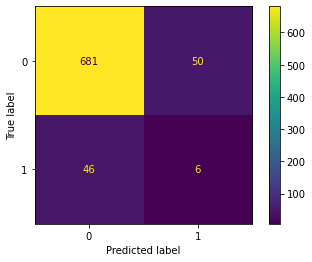

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify = y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
X_train = X_train.transform
y_train = y_train.transform
y_pred = pipe.predict(X_test)
y_pred = pd.DataFrame(y_pred)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.94      0.97      0.96       293
           1       0.31      0.19      0.24        21

    accuracy                           0.92       314
   macro avg       0.63      0.58      0.60       314
weighted avg       0.90      0.92      0.91       314



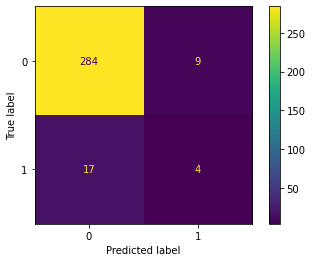

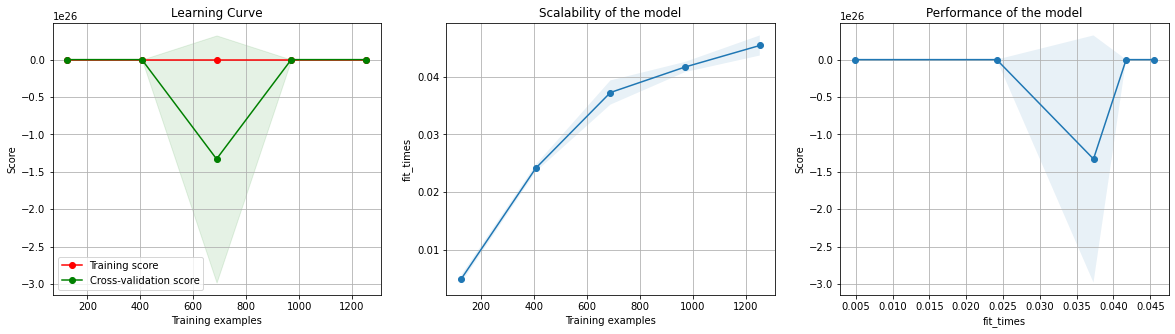

In [299]:
scalerIntoLogReg(X,y,0.2, solver = "newton-cg")

## ajouter courbe ROC calculer AUC

# LogisticRegression().predict_proba

Premiere résultat obtenu avec les paramètre : test_size=0.5, random_state=42
Un test size plus grand genere une erreur sur le nombre d'itération du model, il va faloir supprimer des données inutiles pour l'aggrandir

# TEST 2 : Logistic Reg : Drop 32 columns (NA > 700)

On test sur les meme parametre que le test 1 : test_size=0.5, random_state=42

In [265]:
filter = np.sum(df.isna())>700
df3 = df.drop(columns = df.loc[:,filter].columns)
print("Avant suppresion des NA>700 df: ", np.shape(df))
print("Apres suppresion des NA>700 df3: ", np.shape(df3))

Avant suppresion des NA>700 df:  (1566, 475)
Apres suppresion des NA>700 df3:  (1566, 443)


In [266]:
df3 = df.fillna(df.mean(numeric_only=True))
np.sum(df.isna()).sort_values(ascending= False).sort_values(ascending = False)
X = df3.drop(590, axis = 1)
y = df3[590]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



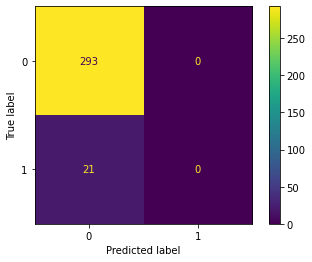

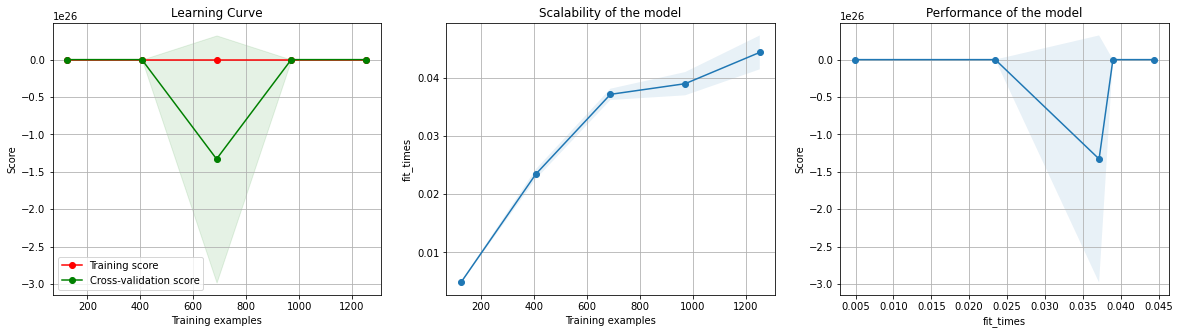

In [273]:
scalerIntoLogReg()

Les résultats sont identiques au test 1, on peut supprimer ces colonnes sans problème

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



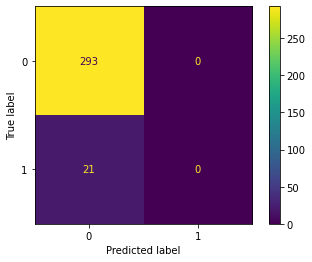

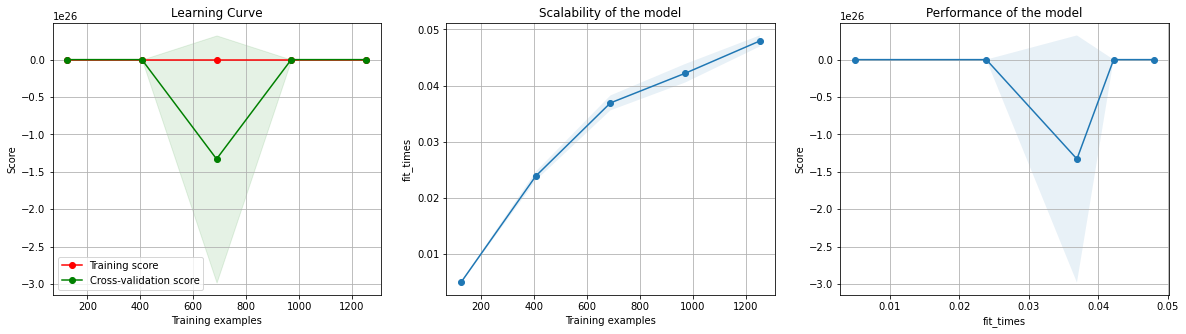

In [268]:
scalerIntoPolyLogReg()

# Analayse du meilleur fill na

5        3
10       4
714      4
12       4
948      4
1340     4
793      4
1428     4
272      8
51       8
4        9
260     12
1017    12
8       12
9       15
14      16
7       20
3       20
24      38
6       57
0       57
1       76
2       84
dtype: int64

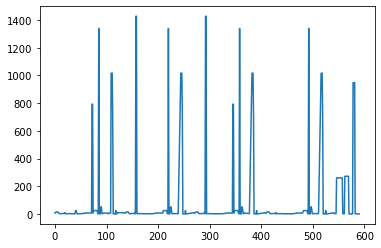

In [253]:
na = np.sum(df.isna())
na.plot()
na = na.sort_values(ascending = False)
na.head(40)
na = pd.DataFrame(na)
na.value_counts().sort_values()

In [254]:
filter = np.sum(df.isna())>700
df4 = df.drop(columns = df.loc[:,filter].columns)
print("Avant suppresion des NA>700 df: ", np.shape(df))
print("Apres suppresion des NA>700 df3: ", np.shape(df4))

Avant suppresion des NA>700 df:  (1566, 475)
Apres suppresion des NA>700 df3:  (1566, 443)


5       3
12      4
10      4
272     8
51      8
4       9
8      12
260    12
9      15
14     16
7      20
3      20
24     38
6      57
0      57
1      76
2      84
dtype: int64

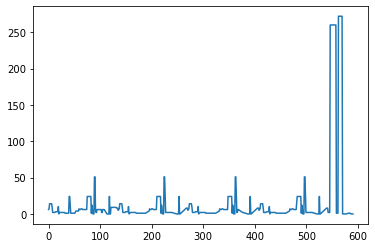

In [256]:
na = np.sum(df4.isna())
na.plot()
na = na.sort_values(ascending = False)
na.head(40)
na = pd.DataFrame(na)
na.value_counts().sort_values()

# Gestion des valeurs abérentes

<AxesSubplot:xlabel='591'>

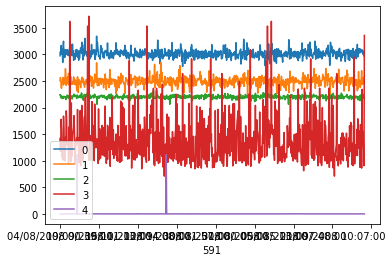

In [107]:
X_train.iloc[:,0:5].plot()

<AxesSubplot:xlabel='591'>

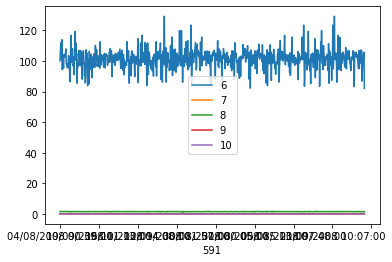

In [105]:
X_train.iloc[:,5:10].plot()

<AxesSubplot:xlabel='591'>

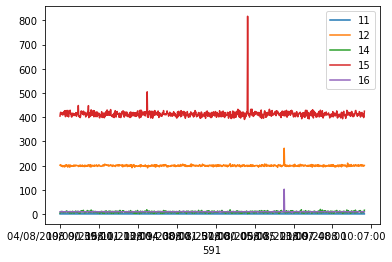

In [94]:
X_train.iloc[:,10:15].plot()

<AxesSubplot:xlabel='591'>

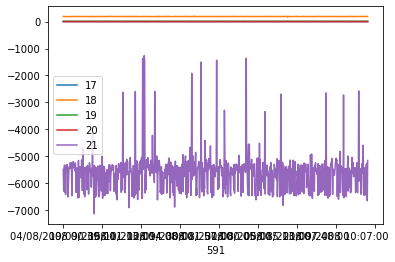

In [96]:
X_train.iloc[:,15:20].plot()

<AxesSubplot:xlabel='591'>

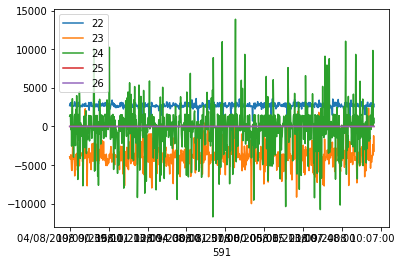

In [97]:
X_train.iloc[:,20:25].plot()

<AxesSubplot:xlabel='591'>

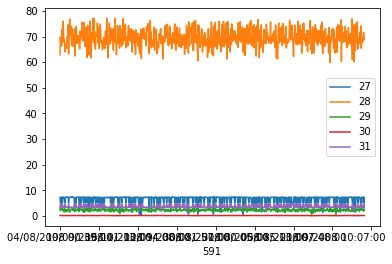

In [98]:
X_train.iloc[:,25:30].plot()

<AxesSubplot:xlabel='591'>

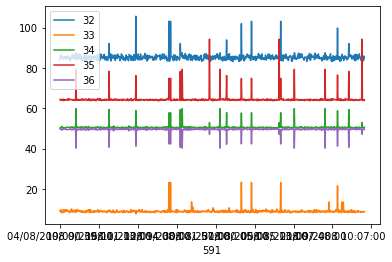

In [99]:
X_train.iloc[:,30:35].plot()

<AxesSubplot:xlabel='591'>

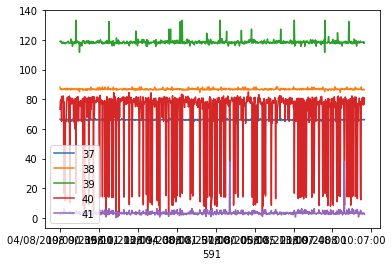

In [100]:
X_train.iloc[:,35:40].plot()

<AxesSubplot:xlabel='591'>

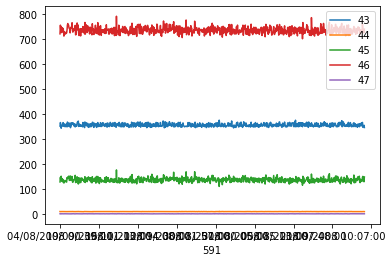

In [101]:
X_train.iloc[:,40:45].plot()

<AxesSubplot:xlabel='591'>

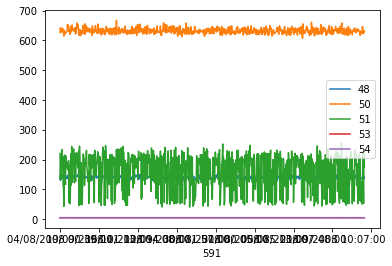

In [ ]:
X_train.iloc[:,45:50].plot()

[]


<AxesSubplot:xlabel='591'>

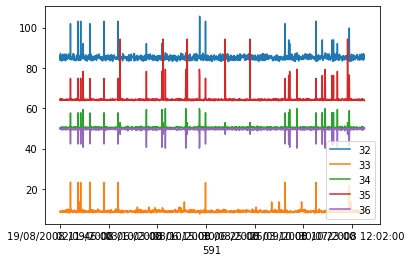

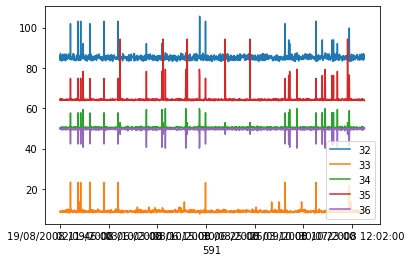

In [130]:
df4 = df.fillna(df.mean(numeric_only=True))
np.sum(df.isna()).sort_values(ascending= False).sort_values(ascending = False)
X = df4.drop(590, axis = 1)
y = df4[590]
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
sc.fit_transform(X_train)

X_train.iloc[:,30:35].plot()

for col in X_train: 
    outlier = []
    mean = X_train[col].mean()
    for i in X_train :
        if i > mean*10:
            outlier.append(i)
print(outlier)            
X_train.iloc[:,30:35].plot()